Training images: (50000, 32, 32, 3)
Testing images: (10000, 32, 32, 3)
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


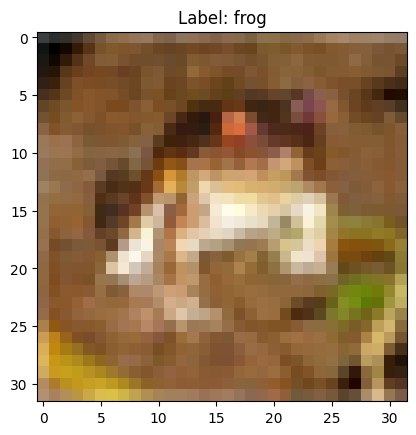

Min pixel value: 0.0
Max pixel value: 1.0
Data ready!


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.2802 - loss: 2.0094 - val_accuracy: 0.3971 - val_loss: 1.6712
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.3961 - loss: 1.6781 - val_accuracy: 0.4229 - val_loss: 1.6100
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.4263 - loss: 1.6083 - val_accuracy: 0.4249 - val_loss: 1.5929
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.4491 - loss: 1.5388 - val_accuracy: 0.4590 - val_loss: 1.4957
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.4618 - loss: 1.5014 - val_accuracy: 0.4544 - val_loss: 1.5264
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4745 - loss: 1.4716 - val_accuracy: 0.4729 - val_loss: 1.4801
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.4821 - loss: 1.4507 - val_accuracy: 0.4730 - val_loss: 1.4855
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.4904 -

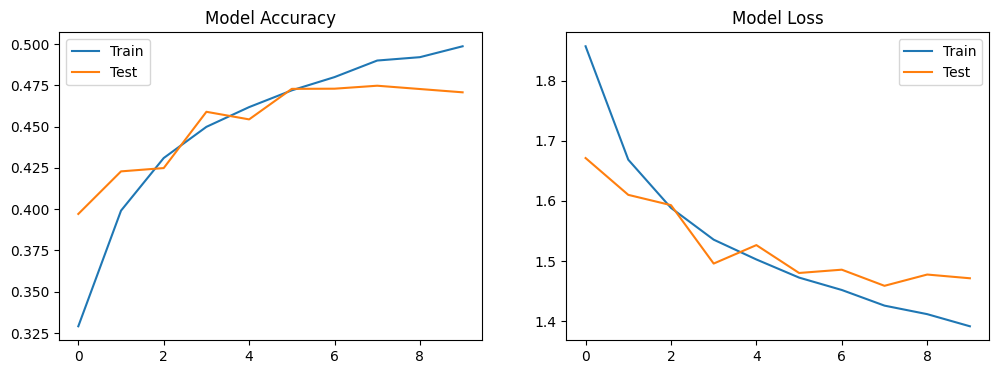

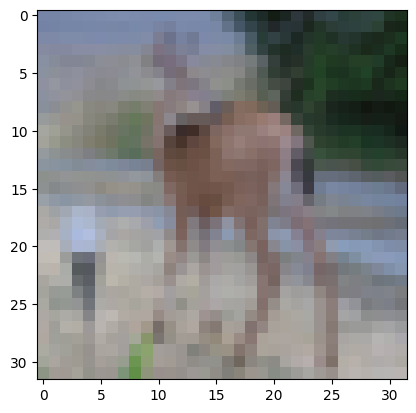

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Predicted: deer
Actual: deer


In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Explore
print("Training images:", X_train.shape)
print("Testing images:", X_test.shape)
print("Classes:", class_names)

# Show sample image
plt.imshow(X_train[0])
plt.title(f"Label: {class_names[Y_train[0][0]]}")
plt.show()
# Normalize pixel values from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Min pixel value:", X_train.min())
print("Max pixel value:", X_train.max())
print("Data ready!")
# Build the Neural Network
model = keras.Sequential([
    # Flatten image from 32x32x3 to single array
    keras.layers.Flatten(input_shape=(32, 32, 3)),

    # Hidden layers
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),

    # Output layer - 10 classes
    keras.layers.Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
# Train the model
history = model.fit(X_train, Y_train,
                    epochs=10,
                    validation_data=(X_test, Y_test))
# Build CNN model
model_cnn = keras.Sequential([
    # Convolutional layers - learn image patterns
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),

    # Flatten and classify
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.fit(X_train, Y_train, epochs=10,
              validation_data=(X_test, Y_test))
# Plot training history
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.legend()

plt.show()
# Test with a single image
image_index = 100
plt.imshow(X_test[image_index])
plt.show()

prediction = model_cnn.predict(X_test[image_index:image_index+1])
predicted_class = class_names[np.argmax(prediction)]
actual_class = class_names[Y_test[image_index][0]]

print(f"Predicted: {predicted_class}")
print(f"Actual: {actual_class}")